In [139]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest

1. Исходные данные

In [140]:
np.random.seed(103)

#X1 ~ R(5, 15)
a = 5
b = 15
n1 = 300
X1 = np.random.uniform(a, b, size = n1)

#X2 ~ N(10, 5)
m = 10
std2 = 5
n2 = 300
X2 = np.random.randn(n2) * std2 + m

In [141]:
#Пирсон
st.pearsonr(X1, X2)

PearsonRResult(statistic=0.0017957857240607517, pvalue=0.9752901972096475)

In [142]:
#Спирмен
st.spearmanr(X1, X2)

SignificanceResult(statistic=0.015201946688296534, pvalue=0.7931507715659338)

In [143]:
#Кендалл
st.kendalltau(X1, X2)

SignificanceResult(statistic=0.009988851727982162, pvalue=0.7963974385864795)

2. Визуальное представление двумерной выборки

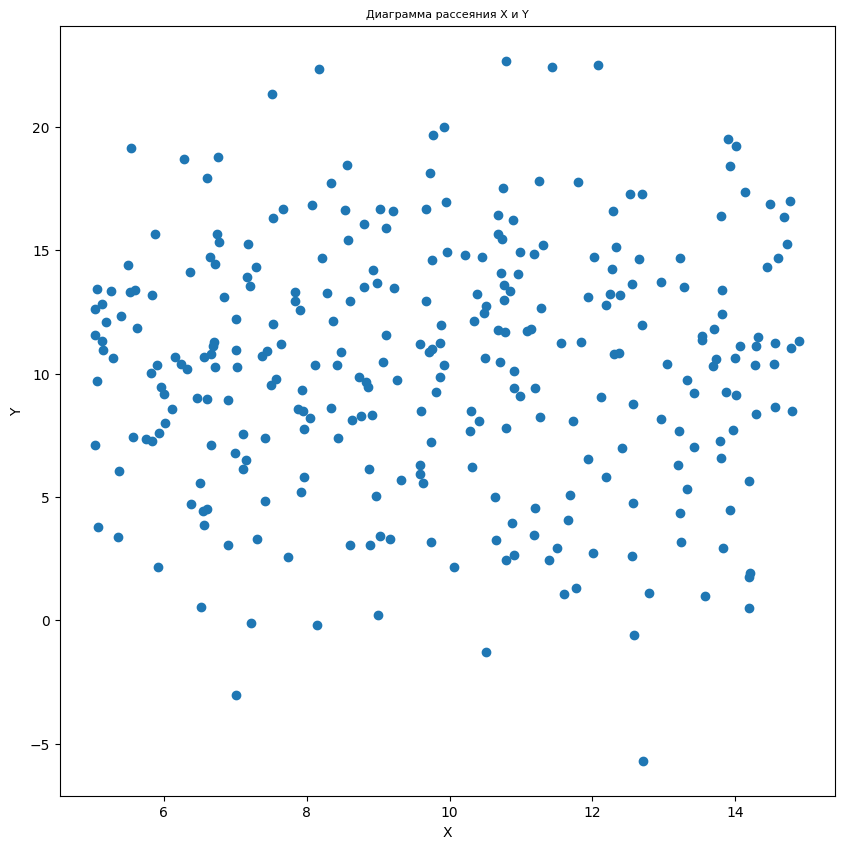

In [144]:
plt.scatter(X1, X2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния X и Y')
plt.show()

3. Проверка независимости методом таблиц сопряженности

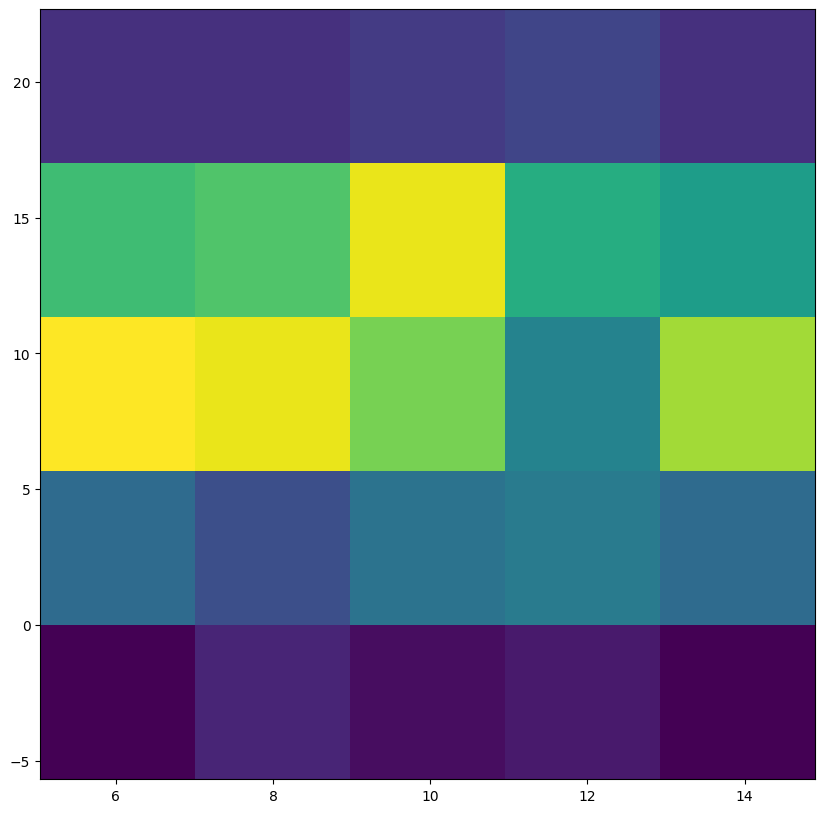

In [145]:
frequency, X_interv, Y_interv, rest = plt.hist2d(X1, X2, bins=5)

In [146]:
print("X:", X_interv)

X: [ 5.03603244  7.00828107  8.9805297  10.95277833 12.92502696 14.89727559]


In [147]:
print("Y:", Y_interv)

Y: [-5.68944767e+00 -1.61825943e-02  5.65708248e+00  1.13303475e+01
  1.70036126e+01  2.26768777e+01]


In [148]:
print("Frequency:\n", frequency)

Frequency:
 [[ 0. 10. 29. 20.  4.]
 [ 3.  7. 28. 21.  4.]
 [ 1. 11. 23. 28.  5.]
 [ 2. 12. 13. 18.  6.]
 [ 0. 10. 25. 16.  4.]]


In [149]:
st.chi2_contingency(frequency)

Chi2ContingencyResult(statistic=16.132422512303343, pvalue=0.4437574816230854, dof=16, expected_freq=array([[ 1.26      , 10.5       , 24.78      , 21.63      ,  4.83      ],
       [ 1.26      , 10.5       , 24.78      , 21.63      ,  4.83      ],
       [ 1.36      , 11.33333333, 26.74666667, 23.34666667,  5.21333333],
       [ 1.02      ,  8.5       , 20.06      , 17.51      ,  3.91      ],
       [ 1.1       ,  9.16666667, 21.63333333, 18.88333333,  4.21666667]]))

4. Исследование корреляционной связи

U = λX + (1–λ)Y, λ∈[0; 1]

V = λX^3 + (1–λ)Y^3, λ∈[0;1]

In [150]:
lumb = np.linspace(0, 1, 100)

kor_V = np.array([])
kor_Sp_V = np.array([])
kor_Ken_V = np.array([])

kor_U = np.array([])
kor_Sp_U = np.array([])
kor_Ken_U = np.array([])

In [151]:
for i in lumb:
  U = i * X1 + (1 - i) * X2
  V = i * X1 ** 3 + (1 - i) * X2 ** 3


  kor_U = np.append(kor_U, st.pearsonr(X1, U)[0])
  kor_Sp_U = np.append(kor_Sp_U, st.spearmanr(X1, U)[0])
  kor_Ken_U = np.append(kor_Ken_U, st.kendalltau(X1, U)[0])

  kor_V = np.append(kor_V, st.pearsonr(X1, V)[0])
  kor_Sp_V = np.append(kor_Sp_V, st.spearmanr(X1, V)[0])
  kor_Ken_V = np.append(kor_Ken_V, st.kendalltau(X1, V)[0])

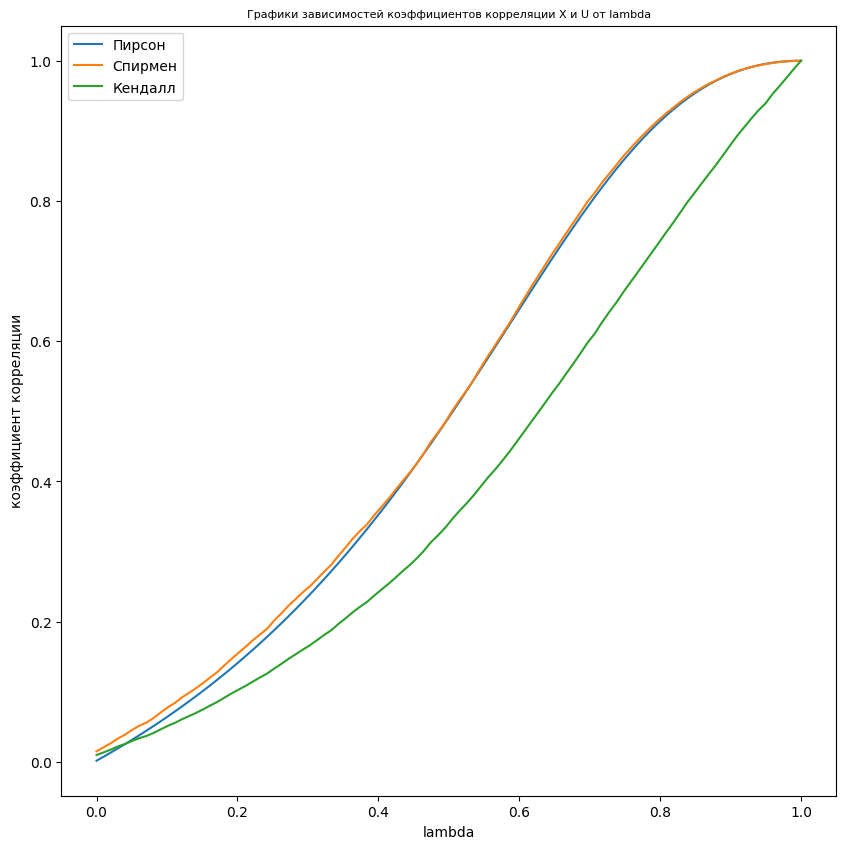

In [152]:
plt.plot(lumb, kor_U, label="Пирсон")
plt.plot(lumb, kor_Sp_U, label="Спирмен")
plt.plot(lumb, kor_Ken_U, label="Кендалл")
plt.xlabel("lambda")
plt.ylabel("коэффициент корреляции");
plt.title("Графики зависимостей коэффициентов корреляции X и U от lambda")
plt.legend();
plt.show()

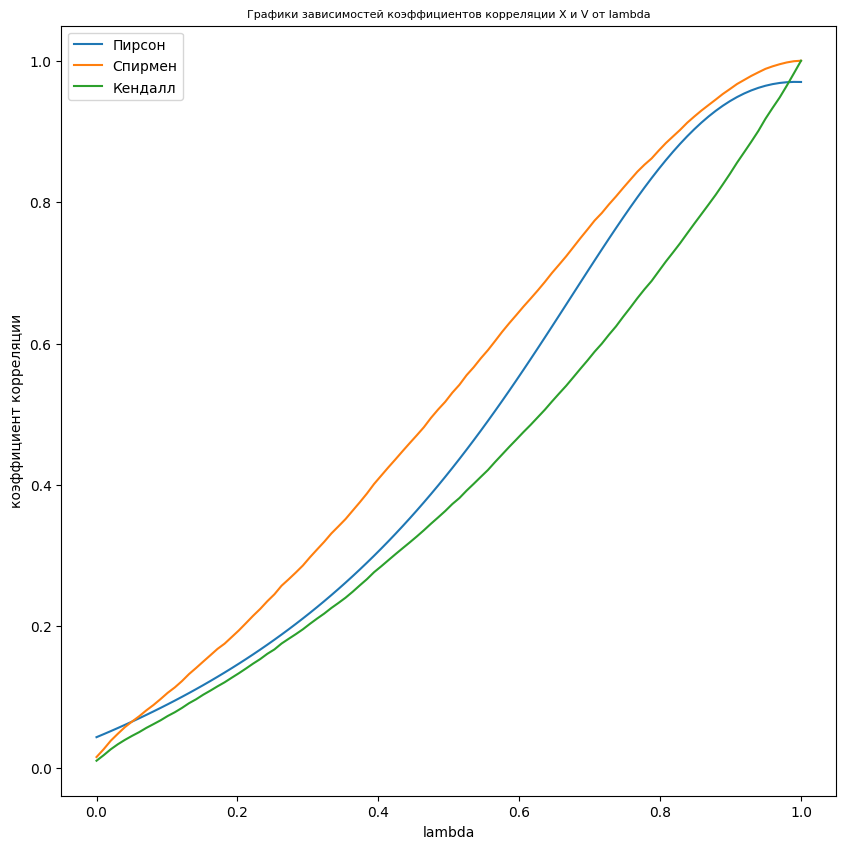

In [153]:
plt.plot(lumb, kor_V, label="Пирсон")
plt.plot(lumb, kor_Sp_V, label="Спирмен")
plt.plot(lumb, kor_Ken_V, label="Кендалл")
plt.xlabel("lambda")
plt.ylabel("коэффициент корреляции");
plt.title("Графики зависимостей коэффициентов корреляции X и V от lambda")
plt.legend();
plt.show()

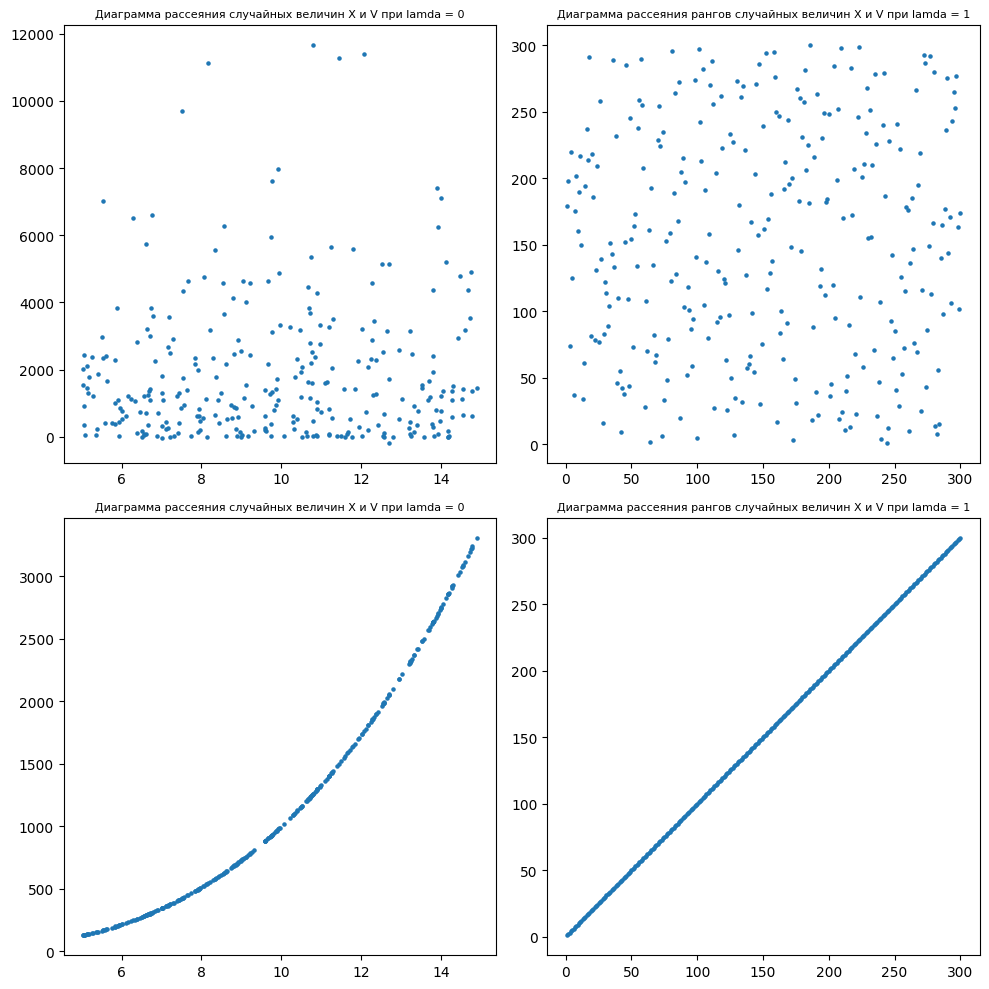

In [154]:
fig, axs = plt.subplots(nrows=2, ncols=2)

plt.rc('axes', titlesize= 8)
plt.rcParams ['figure.figsize'] = [10, 10]

axs[0, 0].scatter(X1, X2 ** 3, s = 5)
axs[0, 0].set_title('Диаграмма рассеяния случайных величин X и V при lamda = 0')

axs[0, 1].scatter(st.rankdata(X1, method='min'), st.rankdata(X2 ** 3, method='min'), s = 5)
axs[0, 1].set_title('Диаграмма рассеяния рангов случайных величин X и V при lamda = 1')

axs[1, 0].scatter(X1, X1 ** 3, s = 5)
axs[1, 0].set_title('Диаграмма рассеяния случайных величин X и V при lamda = 0')

axs[1, 1].scatter(st.rankdata(X1, method='min'), st.rankdata(X1 ** 3, method='min'), s = 5)
axs[1, 1].set_title('Диаграмма рассеяния рангов случайных величин X и V при lamda = 1')

fig.tight_layout()
plt.show()